In [3]:
from scipy import *
from qutip import *
from matplotlib import *
import numpy as np
import matplotlib.pyplot as plt


from sympy import *
init_printing() 


from sympsi import *
from sympsi.pauli import *


from matplotlib import colors
from matplotlib import cm

from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum.operator import Operator

In [4]:
theta, t = symbols("θ, t")
eps, Delta, Omega_q = symbols("ε, Δ, ω_q",real=True, positive=True)
Hsym = symbols("H")

sx, sy, sz = SigmaX(), SigmaY(), SigmaZ()

# Rabi Hamiltonian

In [5]:
#Rabi hamiltonian 
H = -eps/2 * sz - Delta/2 * sx
Eq(Hsym, H)

In [16]:
#    def hamiltonian_transformation(U, H, N=6, collect_operators=None,
#                              independent=False, expansion_search=True):

#Apply an unitary basis transformation to the Hamiltonian H:
#     H = U H U^\dagger -i U d/dt(U^\dagger)

U = exp(I * theta/2 * sy); U

In [14]:
hamiltonian_transformation(U, sx)

In [10]:
H1 = hamiltonian_transformation(U, H)
Eq(Hsym, H1)

In [44]:
H2 = collect(H1.expand(), (sx, sz))
Eq(Hsym, H2)

In [12]:
c, o = split_coeff_operator(H2.args[0]) # diagonalisation сondition of 0-equality of nondiagonal terms

Eq(c, 0)

In [13]:
Eq(tan(theta), Delta/eps)

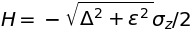

In [20]:
H3 = simplify(H2.subs(theta, atan(Delta/eps)))

Eq(Hsym, H3)

# Diagonalised Hamiltonian

In [21]:
H4 = H3.subs(Delta, sqrt(Omega_q ** 2 - eps ** 2))

Eq(Hsym, H4)

# Resonator Hamiltonian

In [29]:
from sympsi.boson import *
from sympsi.operatorordering import *

In [45]:
omega_r = symbols("ω_r", positive=True)
Hsym = symbols("H")
a = BosonOp("a")

H0 = omega_r * Dagger(a) * a

Eq(Hsym, H0)

In [31]:
omega_d, t = symbols("omega_d, t")
A = symbols("A")

Hdrive = (A * exp(-I * omega_d * t) + conjugate(A) * exp(I * omega_d * t)) * (a + Dagger(a))

Hdrive

In [25]:
H = H0 + Hdrive

Eq(Hsym, H)

In [32]:
U = exp(I * omega_d * t * Dagger(a) * a)

U

In [33]:
H2 = hamiltonian_transformation(U, H.expand())

H2

In [34]:
Delta = symbols("Delta", positive=True)

In [35]:
H3 = collect(H2, Dagger(a) * a).subs(omega_r - omega_d, Delta)

H3

# RWA approximation

In [46]:
H3 = drop_terms_containing(H3, [exp( 2 * I * omega_d * t),
                                exp(-2 * I * omega_d * t)])

Eq(Hsym, H3)

In [47]:
alpha = symbols("alpha")
H = Dagger(a) * alpha - conjugate(alpha) * a
U = exp(H)

U

In [48]:
H4 = hamiltonian_transformation(U, H3)

H4 = collect(H4.expand(), [Dagger(a)*a, a, Dagger(a)])

H4

In [49]:
H5 = H4.subs(alpha, A/Delta)

H5 = drop_c_number_terms(H5)

H5